In [1]:
import pylab as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
import katdal
import katpoint
import scape
import logging
logger = logging.getLogger()
logger.setLevel(logging.ERROR)

In [3]:
#n = '/var/kat/archive/data/RTS/telescope_products/2015/12/03/1449138207.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/11/26/1448574519.h5'
n = '/var/kat/archive/data/RTS/telescope_products/2015/11/26/1448581975.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/11/27/1448589427.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/11/27/1448597061.h5'
#n = '/var/kat/archive/data/RTS/telescope_products/2015/12/03/1449137265.h5'
#n= '/var/kat/archive/data/RTS/telescope_products/2015/12/03/1449140896.h5'

In [4]:
h5 = katdal.open(n,centre_freq=12500.5e6)
print h5

Name: /var/kat/archive/data/RTS/telescope_products/2015/11/26/1448581975.h5 (version 3.0)
Observer: RTS  Experiment ID: 20151126-0015
Description: 'RTS: 3.4 Interferometric_Pointing'
Observed from 2015-11-26 23:52:55.945 UTC to 2015-11-27 01:56:11.817 UTC
Dump rate / period: 1.00042 Hz / 1.000 s
Subarrays: 1
  ID  Antennas                            Inputs  Corrprods
   0  m062,m063                            4       12
Spectral Windows: 1
  ID  Product    CentreFreq(MHz)  Bandwidth(MHz)  Channels  ChannelWidth(kHz)
   0              12500.500         856.000          4096      208.984
-------------------------------------------------------------------------------
Data selected according to the following criteria:
  subarray=0
  ants=['m063', 'm062']
  spw=0
-------------------------------------------------------------------------------
Shape: (7399 dumps, 4096 channels, 12 correlation products) => Size: 2.909 GB
Antennas: m062,*m063  Inputs: 4  Autocorr: yes  Crosscorr: yes
Channels: 

In [5]:
N = len(h5.compscan_indices)
print N

15


In [6]:
h5.select(scans='~slew',channels=slice(1024,1024+2048),corrprods = 'cross')
print h5.compscan_indices


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE
HERE

/usr/local/lib/python2.7/dist-packages/scape/fitting.py:1871: RuntimeWarning: invalid value encountered in sqrt
  std_params = np.sqrt(np.diag(self._interp.cov_params))
/usr/lib/pymodules/python2.7/matplotlib/pyplot.py:412: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_num_figures`).
  max_open_warning, RuntimeWarning)



HERE
HERE
HERE
HERE


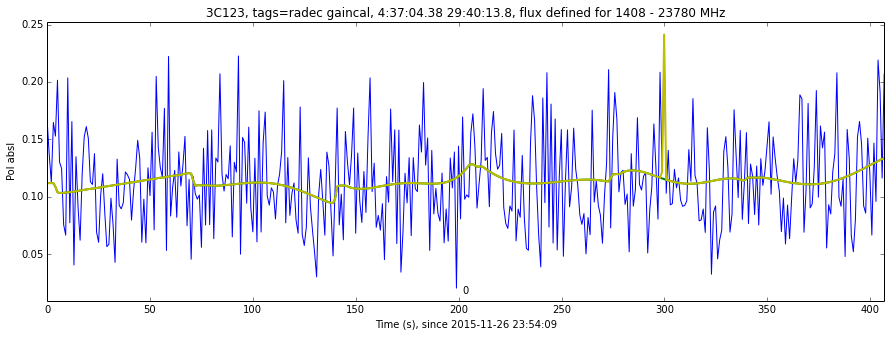

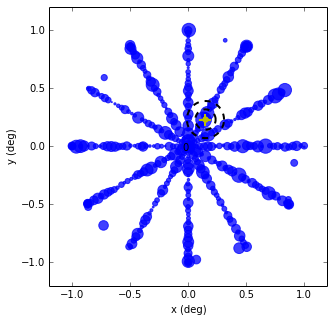

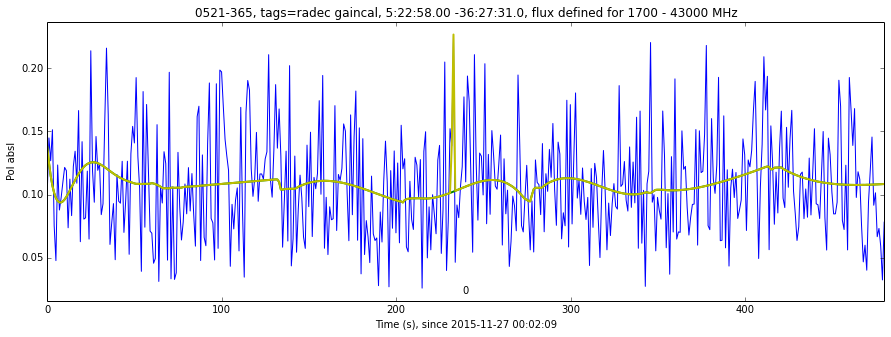

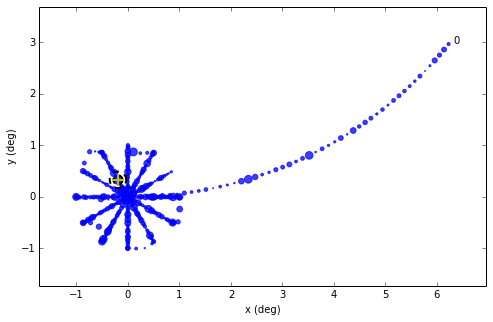

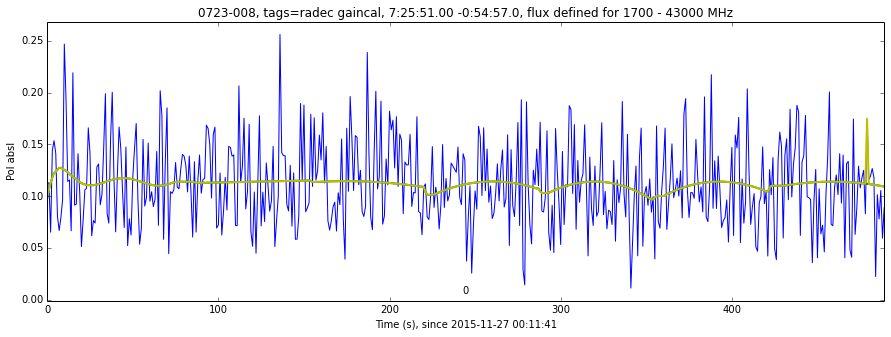

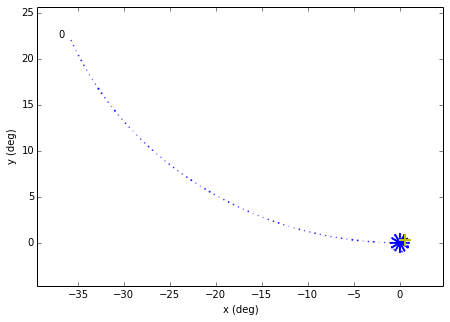

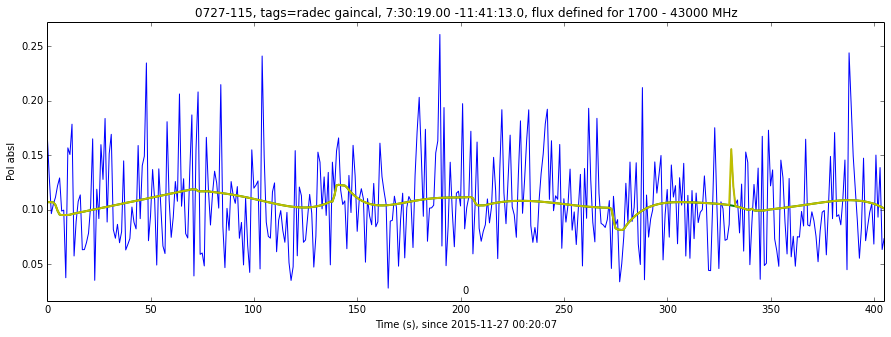

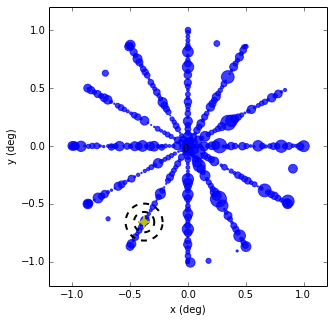

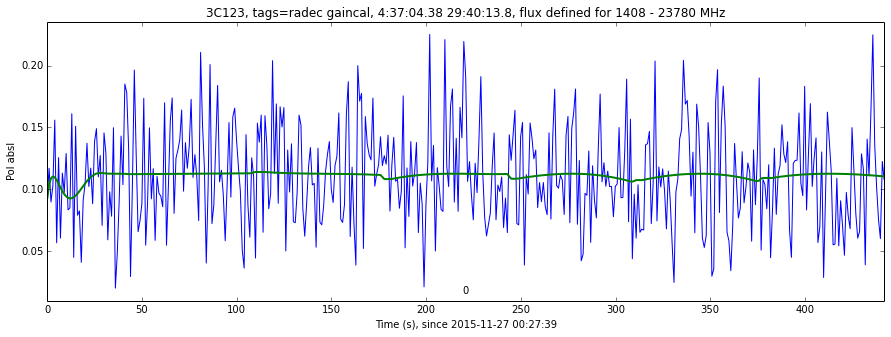

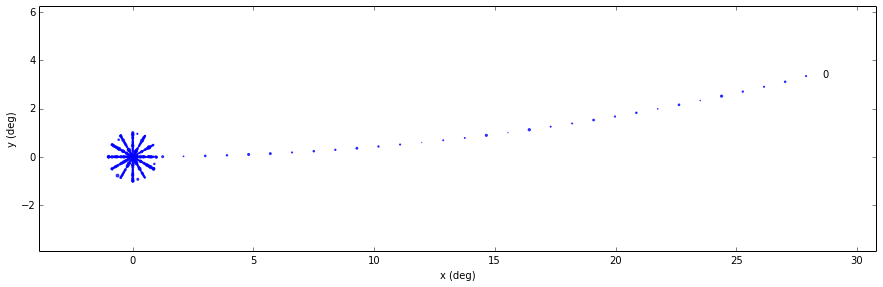

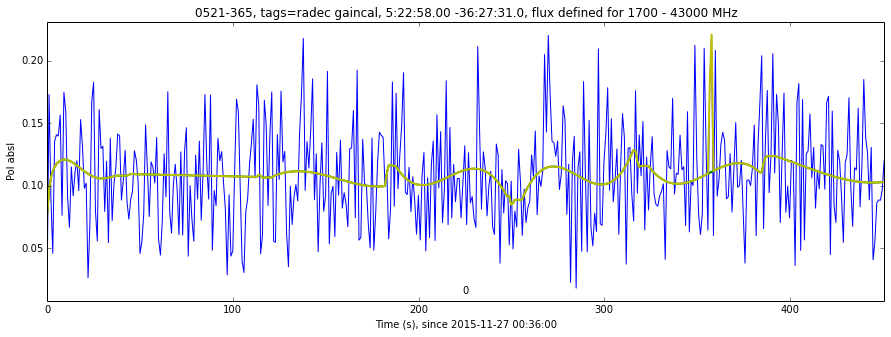

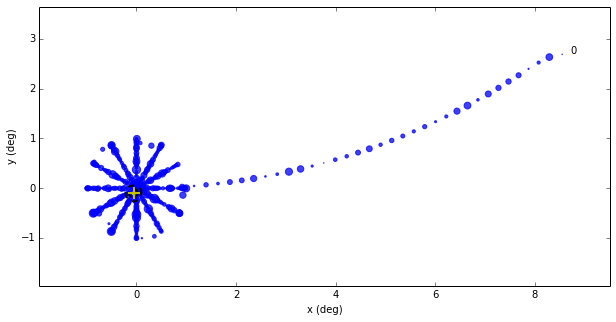

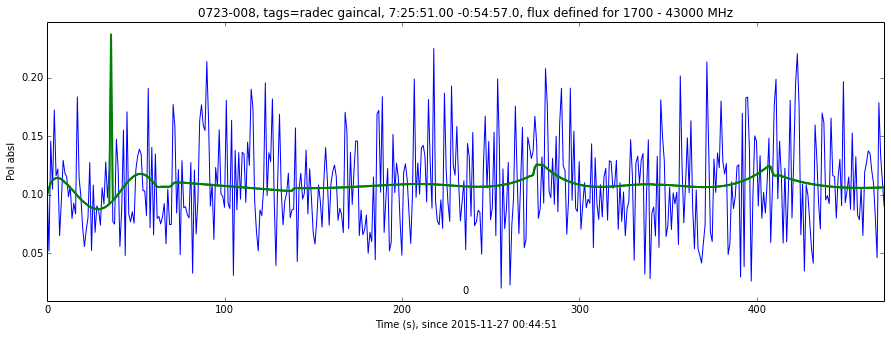

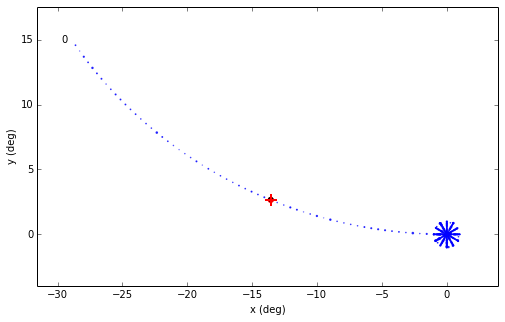

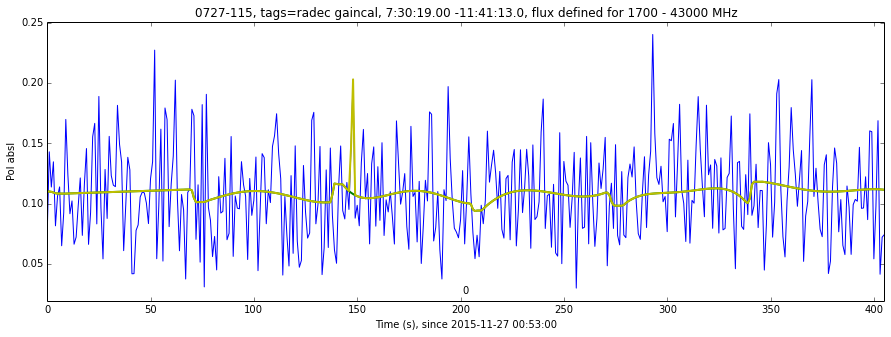

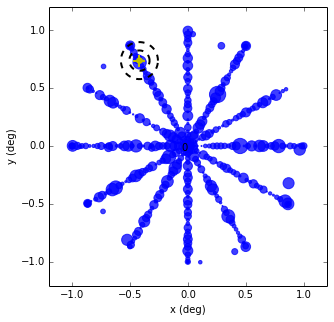

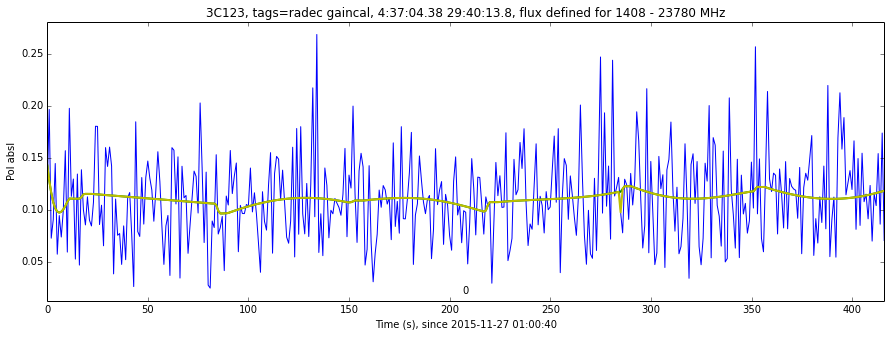

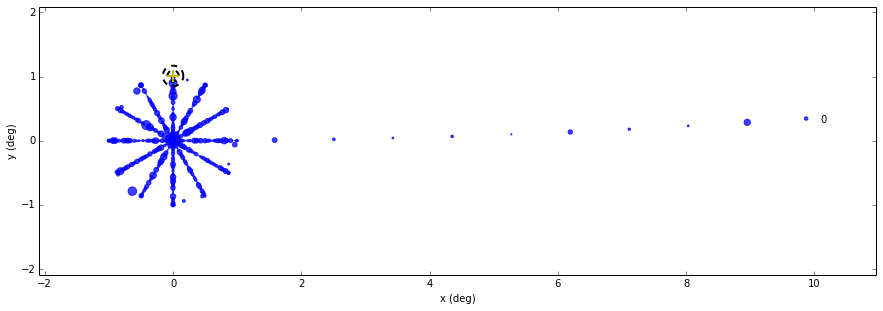

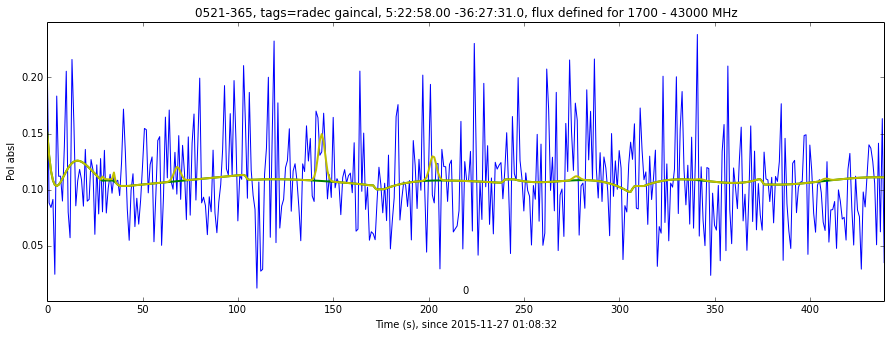

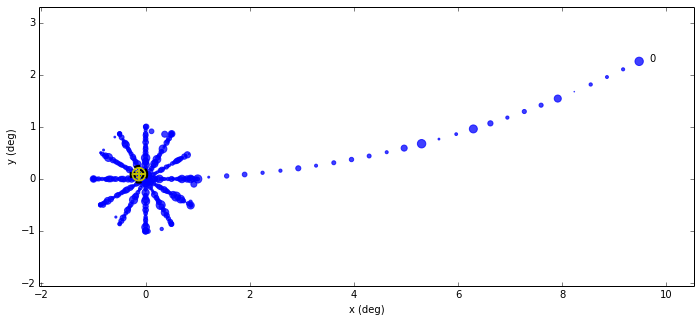

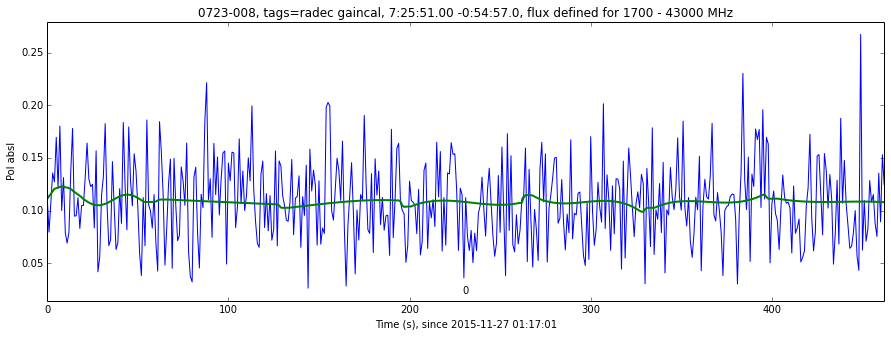

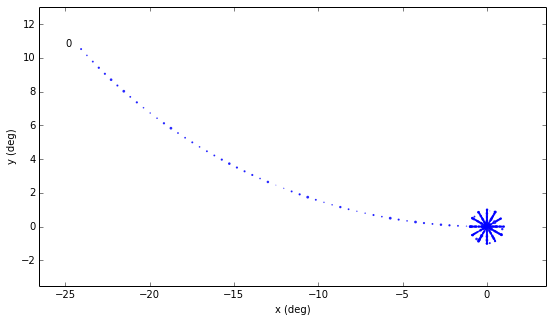

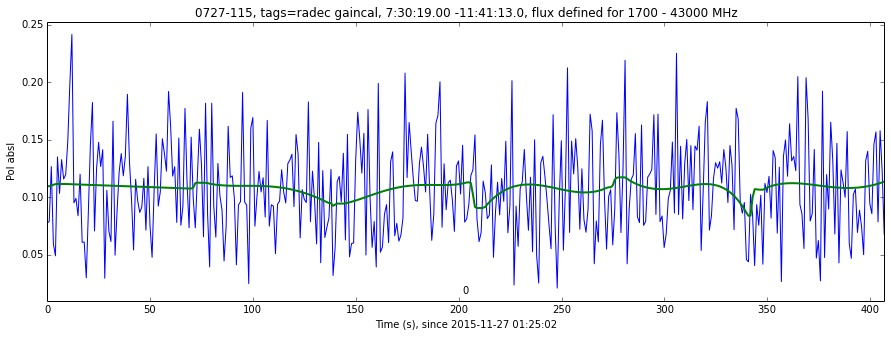

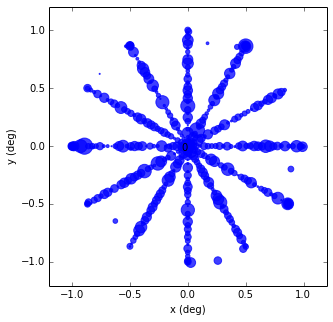

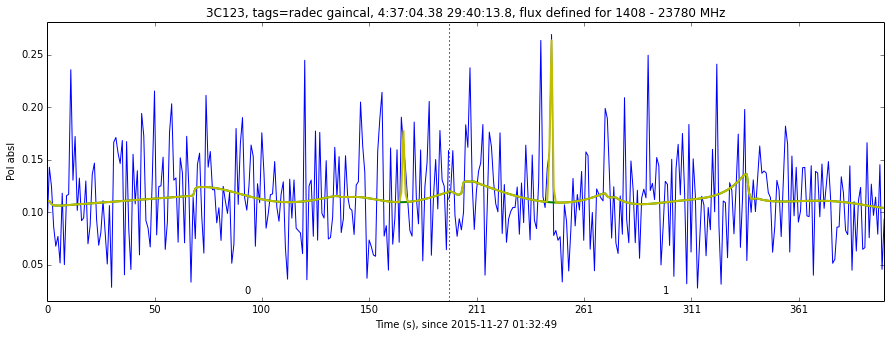

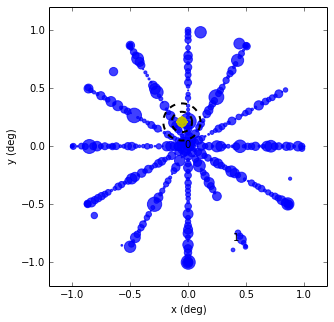

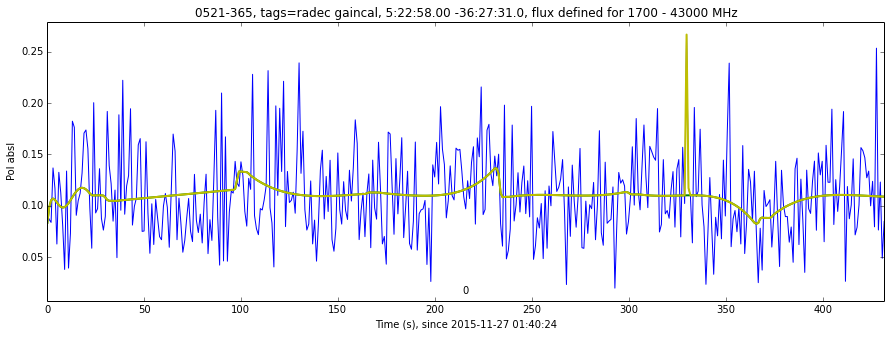

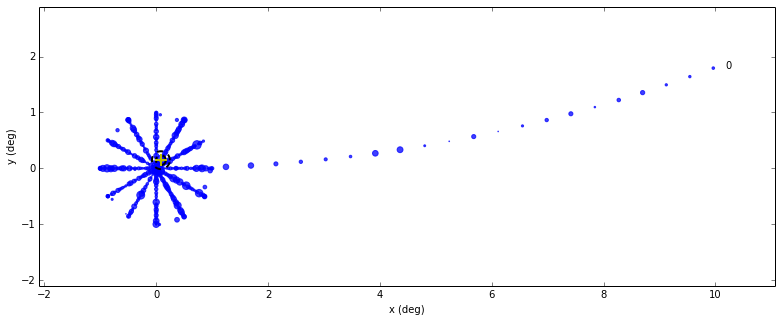

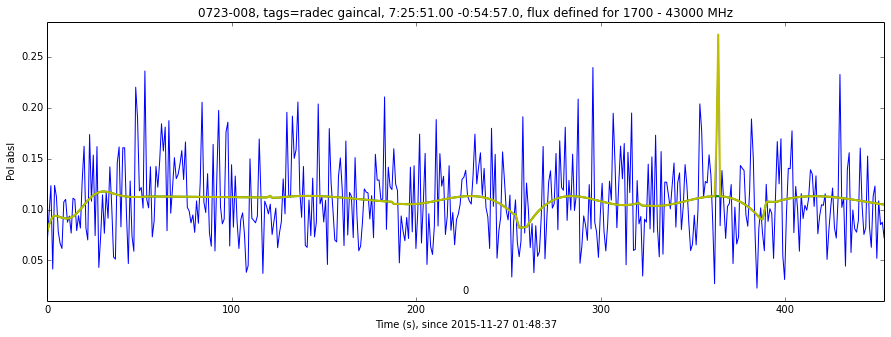

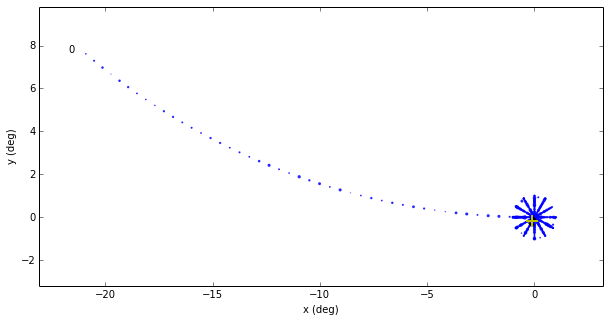

In [7]:

h5.select()
ants = h5.ants
N = len(h5.compscan_indices)
h5.select(scans='track,scan',channels=slice(1024,1024+2048),corrprods = 'cross')
print h5.compscan_indices
for c in h5.compscans():
    d = scape.DataSet(h5,baseline = 'm062,m063')
    #for i in range(len(d.scans)):
    #    d.scans[i].data = scape.stats.remove_spikes(d.scans[i].data,axis=1,spike_width=3,outlier_sigma=5.)    
    d.average()
    print "HERE"
    d.fit_beams_and_baselines()
    plt.figure(figsize=(15,5))
    scape.plot_compound_scan_in_time(d.compscans[0])
    #pl_title = str(d.compscans[0].target) + '. Compscan %d in %d'%(c[0],N)  '. Beamfit valid: %s'%str(d.compscans[0].beam.is_valid) 
    pl_title = str(d.compscans[0].target)
    plt.title(pl_title)
    plt.figure(figsize=(15,5))
    scape.plot_compound_scan_on_target(d.compscans[0])
    #print pl_title, d.compscans[0].beam.center

In [8]:
d=scape.DataSet(h5,baseline = 'm062,m063')
d

<scape.DataSet '20151126-0015' baseline='m062 - m063' compscans=15 at 0x7f84e21f08d0>

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
3C123, tags=radec gaincal, 4:37:04.38 29:40:13.8, flux defined for 1408 - 23780 MHz. Compscan 0 in 15. Beamfit valid: False [-0.00016484  0.00199597]
0521-365, tags=radec gaincal, 5:22:58.00 -36:27:31.0, flux defined for 1700 - 43000 MHz. Compscan 1 in 15. Beamfit valid: False [ 0.00939019  0.00792451]
0723-008, tags=radec gaincal, 7:25:51.00 -0:54:57.0, flux defined for 1700 - 43000 MHz. Compscan 2 in 15. Beamfit valid: True [-0.29719885  0.06381336]
0727-115, tags=radec gaincal, 7:30:19.00 -11:41:13.0, flux defined for 1700 - 43000 MHz. Compscan 3 in 15. Beamfit valid: True [ 0.00091897  0.00093481]
3C123, tags=radec gaincal, 4:37:04.38 29:40:13.8, flux defined for 1408 - 23780 MHz. Compscan 4 in 15. Beamfit valid: True [-0.00026065  0.00047955]
0521-365, tags=radec gaincal, 5:22:58.00 -36:27:31.0, flux defined for 1700 - 43000 MHz. Compscan 5 in 15. Beamfit valid: False [ 0.00599741  0.007205  ]
0723-008, tags=radec gaincal, 7:25:51

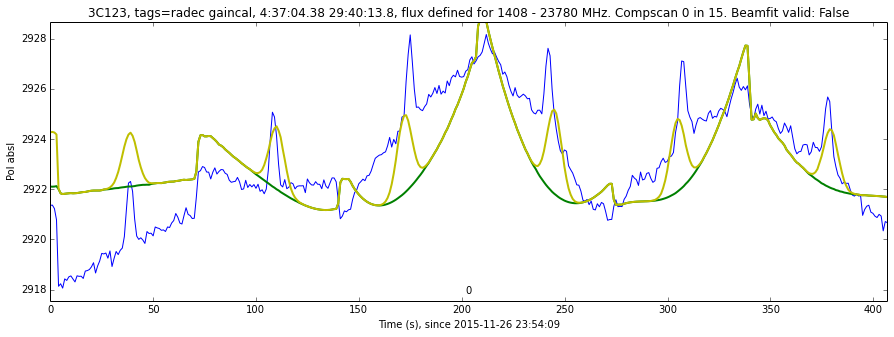

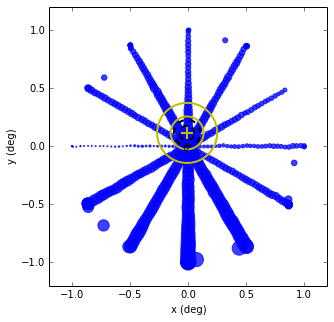

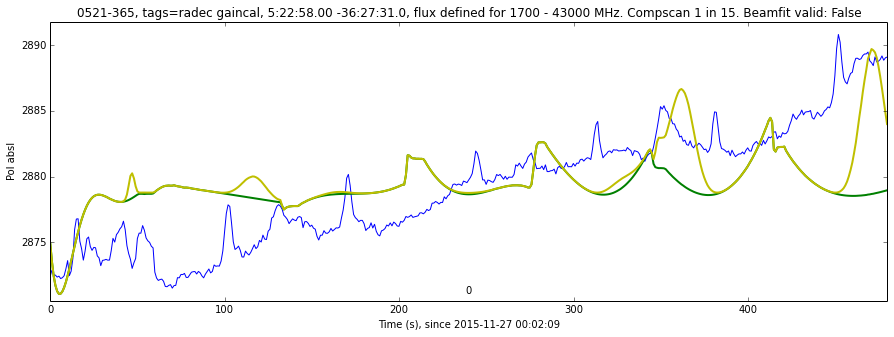

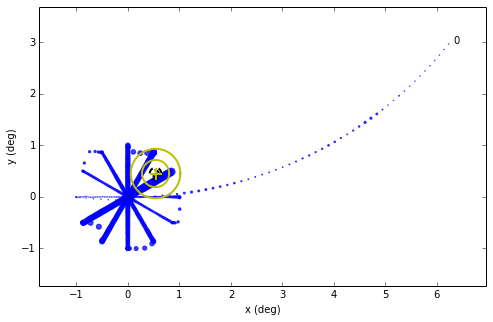

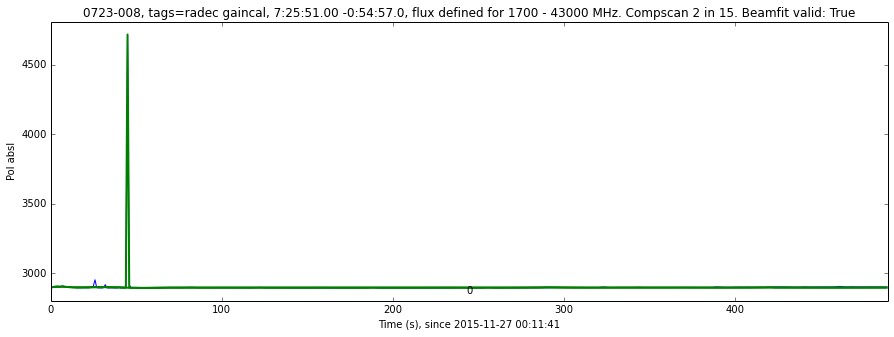

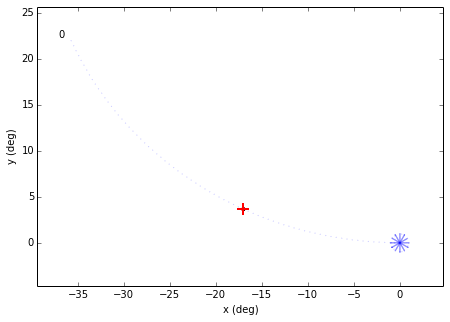

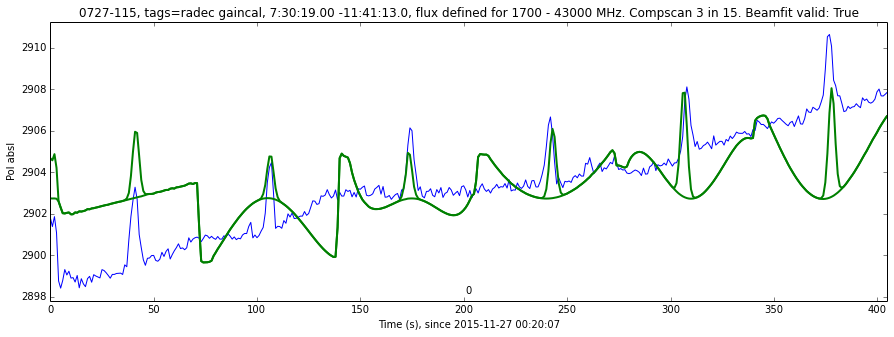

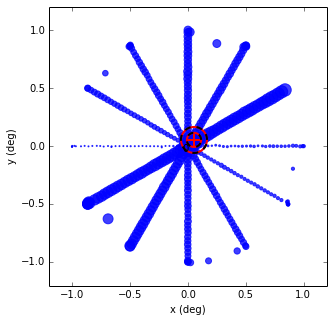

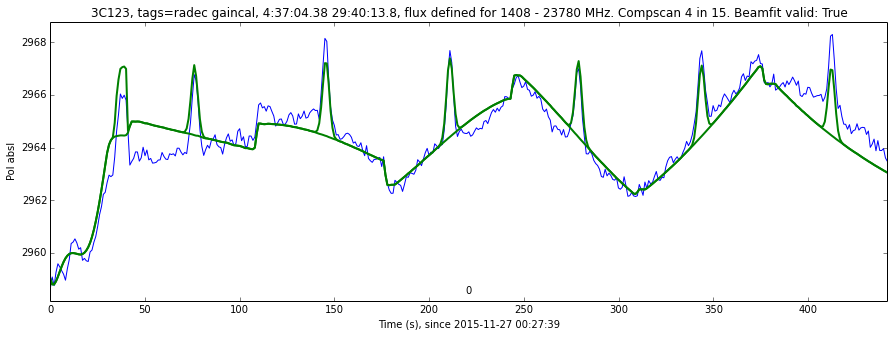

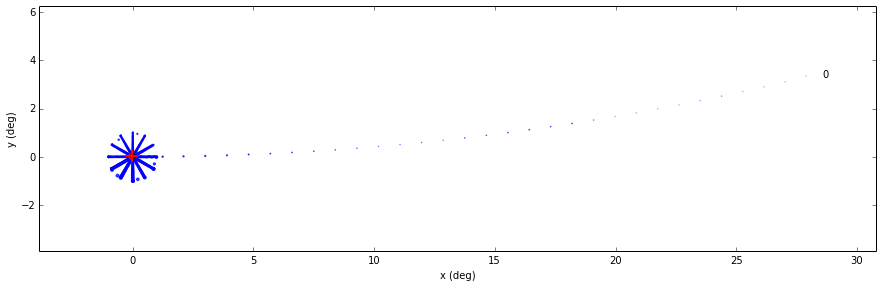

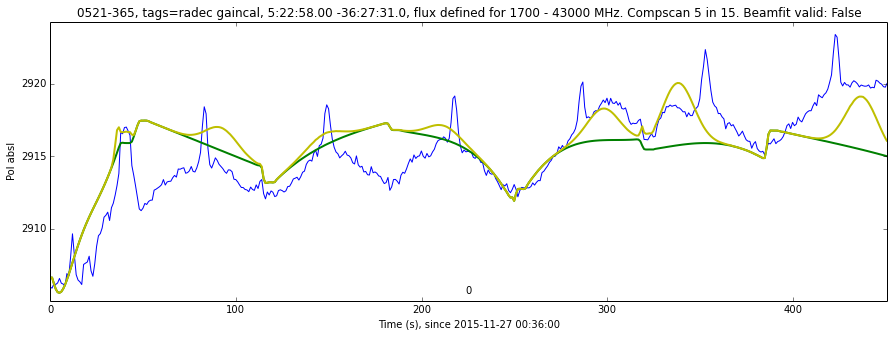

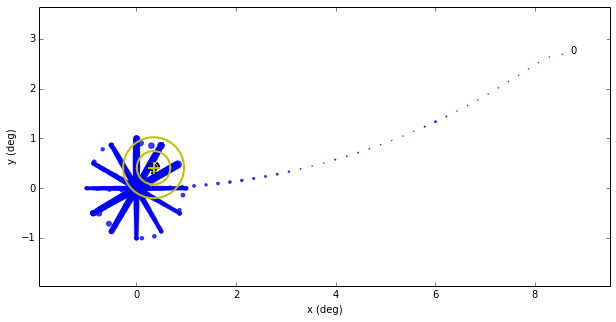

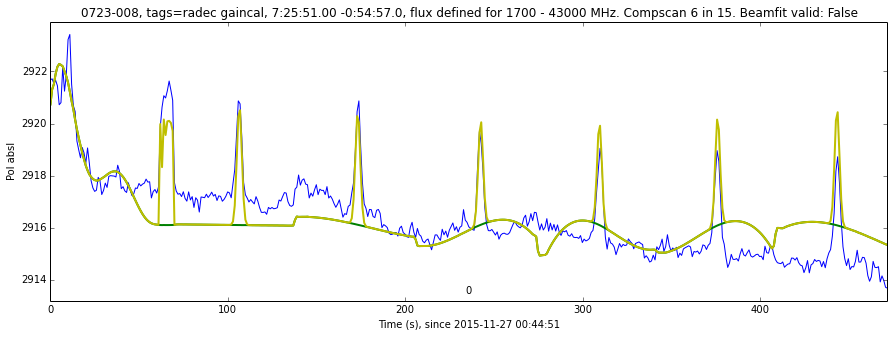

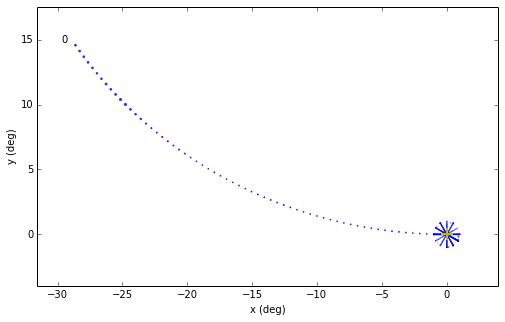

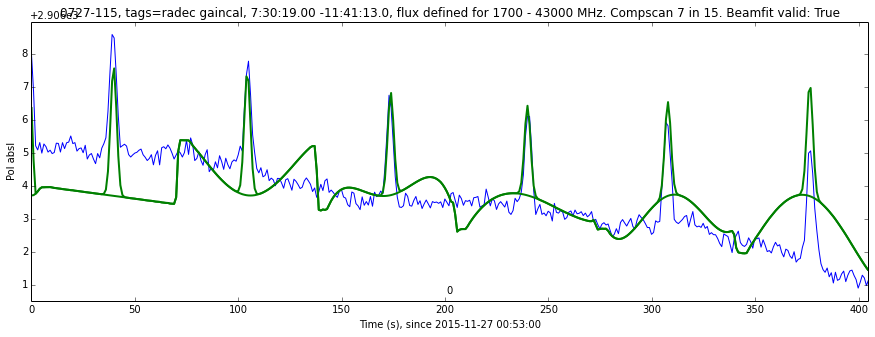

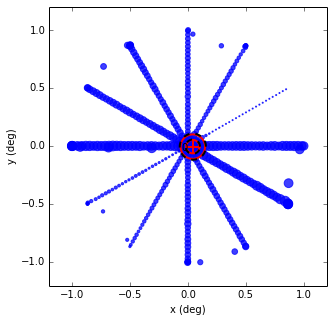

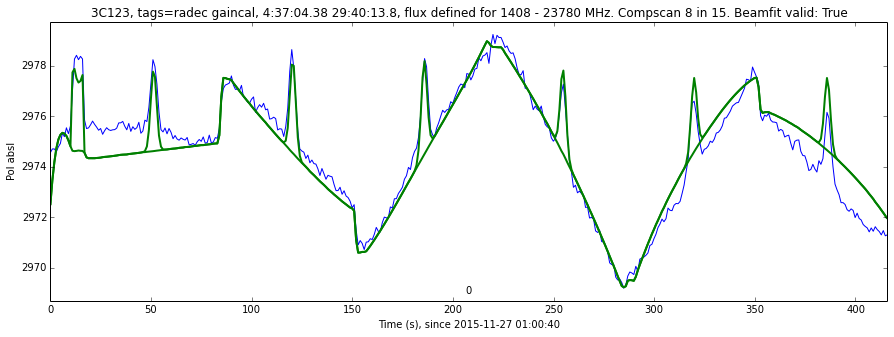

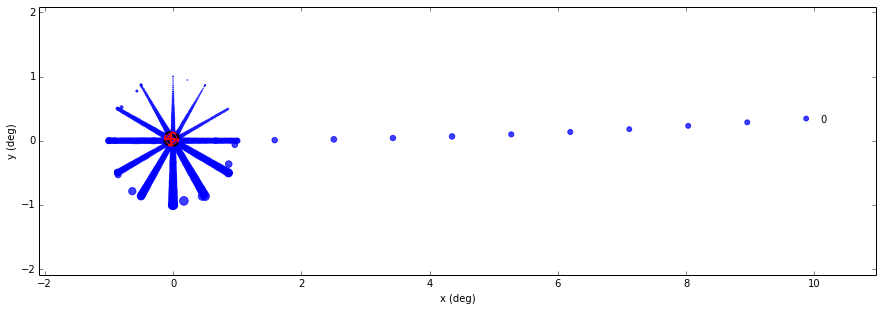

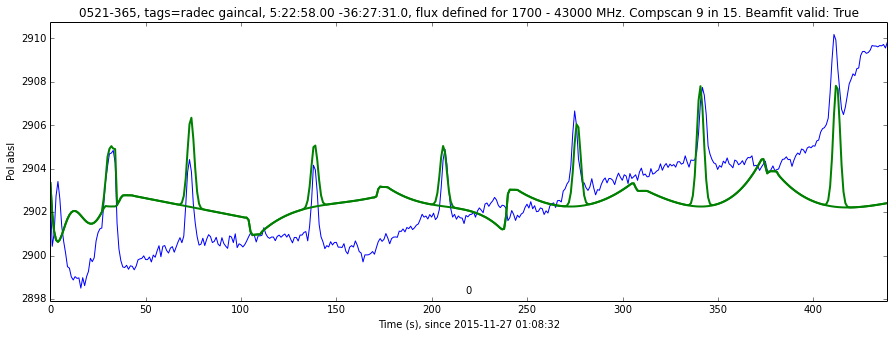

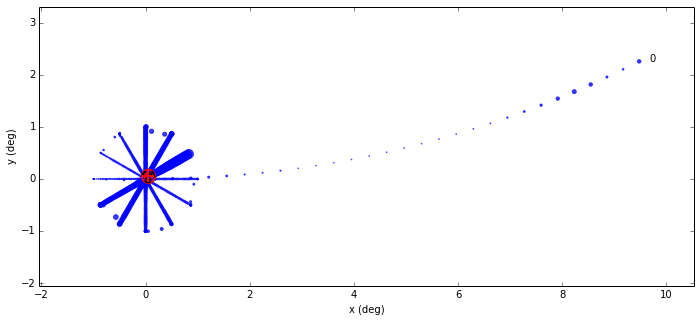

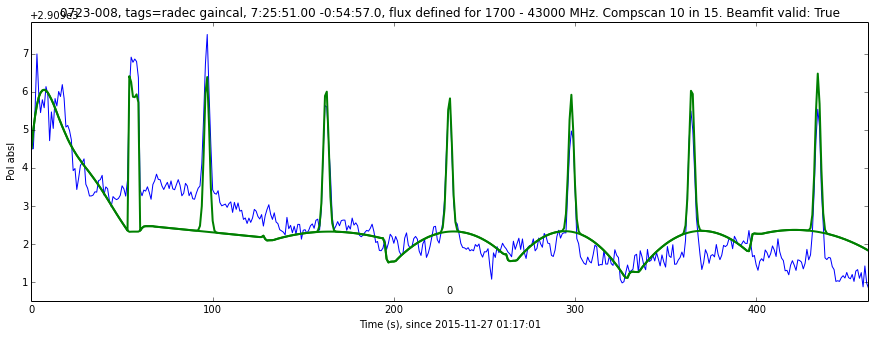

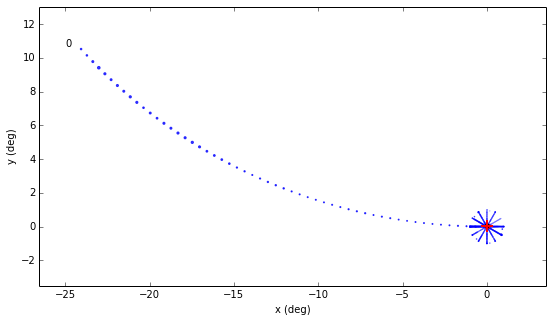

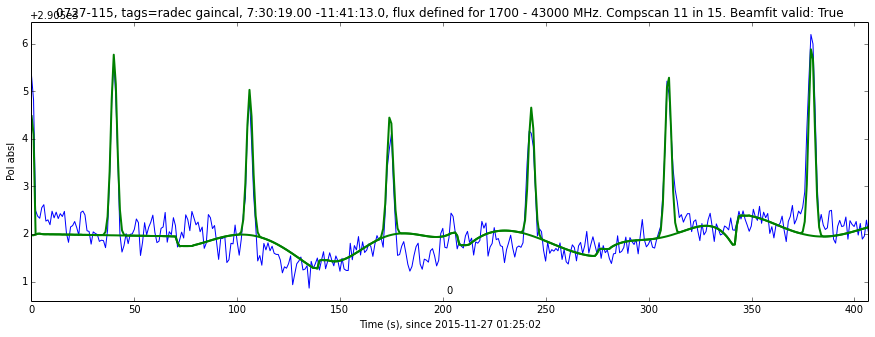

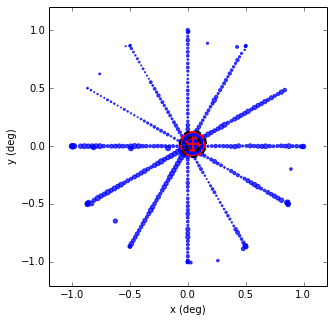

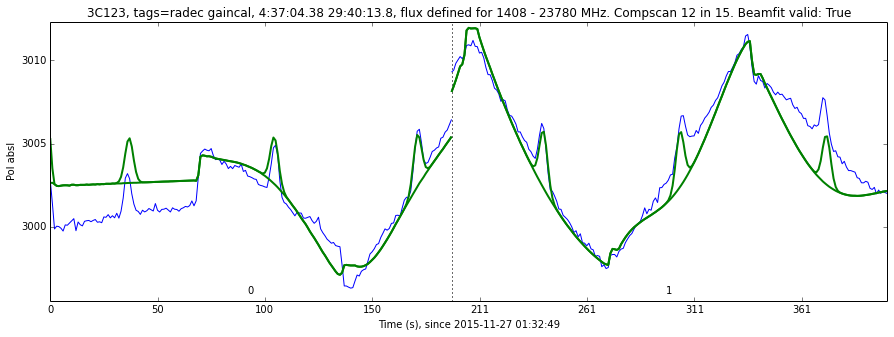

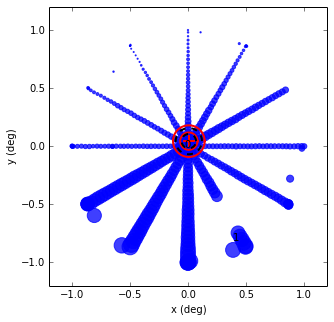

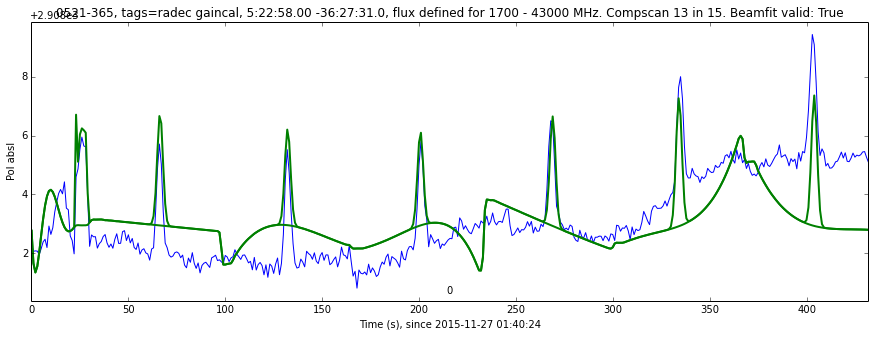

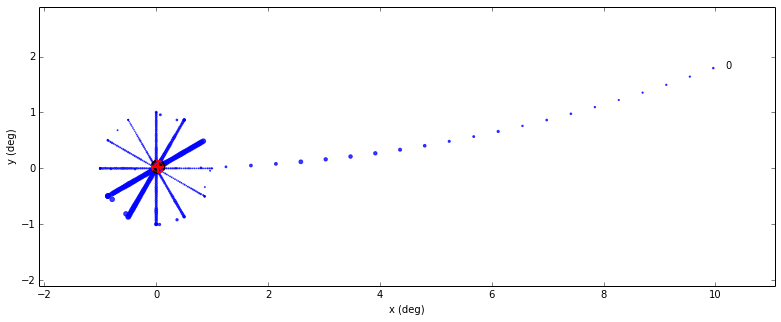

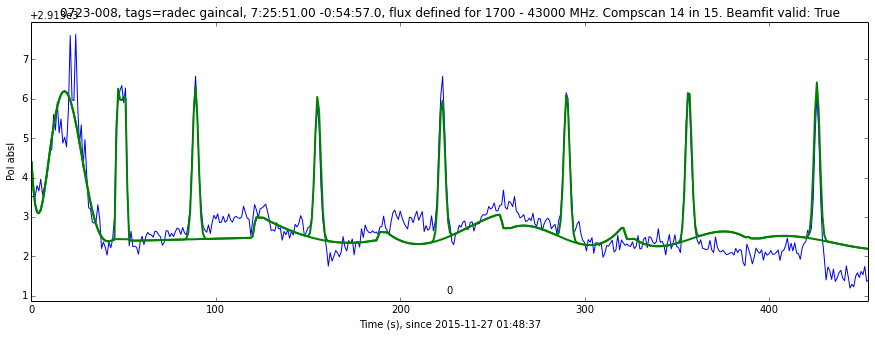

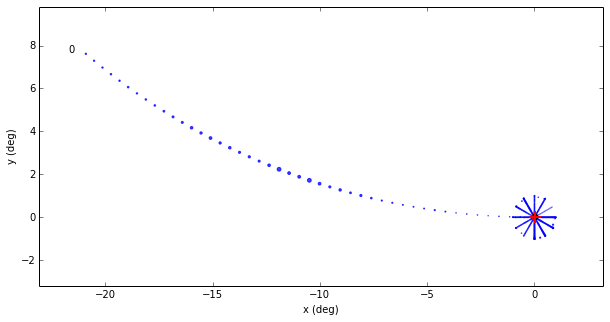

In [9]:

h5.select()
ants = h5.ants
N = len(h5.compscan_indices)
h5.select(scans='track,scan',channels=slice(1024,1024+2048),ants='m062')
print h5.compscan_indices
for c in h5.compscans():
    d = scape.DataSet(h5)
    #for i in range(len(d.scans)):
    #    d.scans[i].data = scape.stats.remove_spikes(d.scans[i].data,axis=1,spike_width=3,outlier_sigma=5.)    
    d.average()
    d.fit_beams_and_baselines()
    figure(figsize=(15,5))
    scape.plot_compound_scan_in_time(d.compscans[0])
    pl_title = str(d.compscans[0].target) + '. Compscan %d in %d'%(c[0],N) + '. Beamfit valid: %s'%str(d.compscans[0].beam.is_valid) 
    title(pl_title)
    figure(figsize=(15,5))
    scape.plot_compound_scan_on_target(d.compscans[0])
    print pl_title, d.compscans[0].beam.center

In [10]:
x= d.compscans[0]
x.beam.is_valid

True